# Study $p_T$ in the generator level
last edit Sep-7, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
clasdis_path = '/Users/erezcohen/Desktop/data/BAND/CLASDIS/eventfiles/our_kinematics/';
claspyth_path = '/Users/erezcohen/Desktop/data/BAND/CLASPYTH/eventfiles/our_kinematics/';
figures_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/'

# (1) Load simulation files and apply kinematical selection cuts

## (1.1) CLASPYTH
Since with CLASPYTH we can not simulate a deuteron target, we merge the simulations of a proton and a neutron targets

In [4]:
e_e_pi_claspyth = dict()

for runnum in range(1):
    
    # neutron target
    xsec_n_nb = 0
    df_n_pips = pd.read_csv(claspyth_path + 'claspytn0.00.e10.600.emn1.00tmn5.0.xs%d_pips.csv'%(xsec_n_nb));
    df_n_pims = pd.read_csv(claspyth_path + 'claspytn0.00.e10.600.emn1.00tmn5.0.xs%d_pims.csv'%(xsec_n_nb));
    # proton target
    xsec_p_nb = 0
    df_p_pips = pd.read_csv(claspyth_path + 'claspytp+.00.e10.600.emn1.00tmn5.0.xs%d_pips.csv'%(xsec_p_nb));
    df_p_pims = pd.read_csv(claspyth_path + 'claspytp+.00.e10.600.emn1.00tmn5.0.xs%d_pims.csv'%(xsec_p_nb));

    # merge - deuteron target
    xsec_d_nb = xsec_n_nb + xsec_p_nb;
    df_pips = pd.concat([df_n_pips, df_p_pips])
    df_pims = pd.concat([df_n_pims, df_p_pims])
    
    # Add Zpi variable which is mislabeled here as pi_Z
    df_pips['Zpi'] = df_pips['pi_Z']
    df_pims['Zpi'] = df_pims['pi_Z']


    
    if runnum==0:
        xsec_claspyth = xsec_d_nb;
        e_e_pi_claspyth['piplus']  = df_pips
        e_e_pi_claspyth['piminus'] = df_pims
    else:
        e_e_pi_claspyth['piplus']  = pd.concat([e_e_pi_claspyth['piplus'] ,df_pips])
        e_e_pi_claspyth['piminus'] = pd.concat([e_e_pi_claspyth['piminus'],df_pims])
    
print('Loaded %d π+ events and %d π- events'%(len(e_e_pi_claspyth['piplus']),len(e_e_pi_claspyth['piminus'])))

Loaded 10768393 π+ events and 10581247 π- events


In [5]:
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    e_e_pi_claspyth[pi_ch]["pi_DC_sector"]    = 1
e_e_pi_claspyth_after_acceptance_matching_cut = apply_p_theta_acceptance_cut_single_set( e_e_pi_claspyth )

Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus which includes 10768393 events
Applying p-theta on cut for piplus on 10768393 events
10768393 in sector 1


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 2


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 3


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 4


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 5


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 6


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


Applying p-theta on cut for piminus which includes 10581247 events
Applying p-theta on cut for piminus on 10581247 events
10581247 in sector 1


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 2


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 3


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 4


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 5


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 6


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


In [6]:
e_e_pi_claspyth_after_Mx_cut                  = apply_Mx_cut( e_e_pi_claspyth_after_acceptance_matching_cut )
e_e_pi_claspyth_after_Kinematical_cuts        = apply_Kinematical_cuts( e_e_pi_claspyth_after_Mx_cut, W_min=2.5 )
e_e_pi_claspyth_pass_cuts                     = e_e_pi_claspyth_after_Kinematical_cuts;

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2


In [7]:
print('Retained %d π+ events and %d π- events'%(len(e_e_pi_claspyth_pass_cuts['piplus']),len(e_e_pi_claspyth_pass_cuts['piminus'])))

Retained 2073830 π+ events and 1515932 π- events


In [8]:
Mx_diffractive = 1.4 # GeV/c2

e_e_pi_claspyth_pass_cuts_direct              = dict() 
e_e_pi_claspyth_pass_cuts_diffractive_rho     = dict()
e_e_pi_claspyth_pass_cuts_non_diffractive_rho = dict()

for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df = e_e_pi_claspyth_pass_cuts[pi_ch]
    df = df[df.pi_Z > 0.3]

    pi_from_rho = df[(df.pi_parent_PDG==113)|(df.pi_parent_PDG==213)|(df.pi_parent_PDG==-213)]
    
    M_x_rho             = pi_from_rho.M_x_rho
    diffractive_rho     = pi_from_rho[pi_from_rho.M_x_rho < Mx_diffractive]
    non_diffractive_rho = pi_from_rho[Mx_diffractive < pi_from_rho.M_x_rho ]
    
    e_e_pi_claspyth_pass_cuts_direct[pi_ch]              = df[(df.pi_parent_PDG==2)|(df.pi_parent_PDG==-2)|(df.pi_parent_PDG==91)|(df.pi_parent_PDG==92)|(df.pi_parent_PDG==93)]
    e_e_pi_claspyth_pass_cuts_diffractive_rho[pi_ch]     = diffractive_rho
    e_e_pi_claspyth_pass_cuts_non_diffractive_rho[pi_ch] = non_diffractive_rho



# (2) Auxliary

# (3) Compute ratios of direct to non-direct pion production
in bins of $Q^2,x_B,z,p_T$

### (3.1) Define binning

In [9]:
dQ2 = 1
Q2_min_arr = np.arange(2,8,dQ2)
Q2_max_arr = Q2_min_arr + dQ2

dxB = 0.1
xB_min_arr = np.arange(0.2,0.6,dxB)
xB_max_arr = xB_min_arr + dxB

dz = 0.1
z_min_arr = np.arange(0.3,0.8,dz)
z_max_arr = z_min_arr + dz

dpT = 0.3
pT_min_arr = np.arange(0.,1.2,dpT)
pT_max_arr = pT_min_arr + dpT

In [10]:
print('Q2', end=": " )
for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): print('%.1f - %.1f, '%(Q2_min,Q2_max), end="" )
print()
print('xB', end=": " )
for xB_min,xB_max in zip(xB_min_arr, xB_max_arr): print('%.1f - %.1f, '%(xB_min,xB_max), end="" )
print()
print('z', end=": " )
for z_min,z_max in zip(z_min_arr, z_max_arr): print('%.1f - %.1f, '%(z_min,z_max), end="" )
print()
print('pT', end=": " )
for pT_min,pT_max in zip(pT_min_arr, pT_max_arr): print('%.1f - %.1f, '%(pT_min,pT_max), end="" )

Q2: 2.0 - 3.0, 3.0 - 4.0, 4.0 - 5.0, 5.0 - 6.0, 6.0 - 7.0, 7.0 - 8.0, 
xB: 0.2 - 0.3, 0.3 - 0.4, 0.4 - 0.5, 0.5 - 0.6, 
z: 0.3 - 0.4, 0.4 - 0.5, 0.5 - 0.6, 0.6 - 0.7, 0.7 - 0.8, 
pT: 0.0 - 0.3, 0.3 - 0.6, 0.6 - 0.9, 0.9 - 1.2, 

## (3.2) Compute ratios

In [11]:
df_direct_ratio = dict()
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df_all    = e_e_pi_claspyth_pass_cuts[pi_ch]
    df_direct = e_e_pi_claspyth_pass_cuts_direct[pi_ch]
    df_direct_ratio[pi_ch] = pd.DataFrame()

    for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): # zip([Q2_min_arr[0]], [Q2_max_arr[0]]): #
        
        df_all_in_Q2_bin = df_all[ (Q2_min < df_all.Q2) & (df_all.Q2 < Q2_max)]                    
        df_direct_in_Q2_bin = df_direct[ (Q2_min < df_direct.Q2) & (df_direct.Q2 < Q2_max)]                
        
        for xB_min,xB_max in zip(xB_min_arr, xB_max_arr): # zip([xB_min_arr[0]], [xB_max_arr[0]]): # 
            
            df_all_in_xB_bin = df_all_in_Q2_bin[ (xB_min < df_all_in_Q2_bin.xB) & (df_all_in_Q2_bin.xB < xB_max)]
            df_direct_in_xB_bin = df_direct_in_Q2_bin[ (xB_min < df_direct_in_Q2_bin.xB) & (df_direct_in_Q2_bin.xB < xB_max)]
            
            for z_min,z_max in zip(z_min_arr, z_max_arr): # zip([z_min_arr[0]], [z_max_arr[0]]):  # 
                
                df_all_in_z_bin = df_all_in_xB_bin[ (z_min < df_all_in_xB_bin.Zpi) & (df_all_in_xB_bin.Zpi < z_max)]
                df_direct_in_z_bin = df_direct_in_xB_bin[ (z_min < df_direct_in_xB_bin.Zpi) & (df_direct_in_xB_bin.Zpi < z_max) ]
                    
                
                for pT_min,pT_max in zip(pT_min_arr, pT_max_arr): 

                    df_all_in_bin    = df_all_in_z_bin[ (pT_min < df_all_in_z_bin.pi_qFrame_pT) & (df_all_in_z_bin.pi_qFrame_pT < pT_max)]                    
                    df_direct_in_bin = df_direct_in_z_bin[ (pT_min < df_direct_in_z_bin.pi_qFrame_pT) & (df_direct_in_z_bin.pi_qFrame_pT < pT_max)]
                    
                    N_all_in_bin    = np.max([1,float(len(df_all_in_bin))])
                    N_direct_in_bin = np.max([1,float(len(df_direct_in_bin))])
                    f_direct_in_bin     = N_direct_in_bin / N_all_in_bin
                    f_direct_in_bin_err = f_direct_in_bin * np.sqrt( 1./N_direct_in_bin +1./N_all_in_bin)
                    
                    # define the ratio to be zero in bins of zero statistics 
                    if N_direct_in_bin==1: 
                        f_direct_in_bin = 0;
                        f_direct_in_bin_err = 0;
                    new_record = pd.DataFrame([{'Q2_min':Q2_min,'Q2_max':Q2_max,
                                                'xB_min':xB_min,'xB_max':xB_max,
                                                'z_min':z_min,'z_max':z_max,
                                                'pT_min':pT_min,'pT_max':pT_max,
                                                'f_direct':f_direct_in_bin,'f_direct_err':f_direct_in_bin_err}])

                    # record the results in the dataframe
                    df_direct_ratio[pi_ch] = pd.concat([df_direct_ratio[pi_ch], new_record], ignore_index=True)

print('done');                    

done


In [12]:
# print('Q2>%.1f,xB>%.2f,z>%.1f,pT>%.1f,f=%.2f'%(Q2_min,xB_min,z_min,pT_min, f_direct_in_bin))
# print(len(df_all_in_bin.pi_parent_PDG), len(df_direct_in_bin.pi_parent_PDG))

# plt.figure;
# plot_discrete_histogram(df_all_in_bin.pi_parent_PDG)

# parent = df_all_in_bin.pi_parent_PDG;
# print(len(parent[parent==-213]),len(parent[parent==113]),len(parent[parent==92]))

In [13]:
direct_ratio_dir = '/Users/erezcohen/Desktop/data/BAND/CLASPYTH/direct_pion_ratios/'
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df_direct_ratio[pi_ch].to_csv(direct_ratio_dir + 'direct_'+pi_ch+'.csv',float_format='%.3f')
    display(df_direct_ratio[pi_ch])

,Q2_min,Q2_max,xB_min,xB_max,z_min,z_max,pT_min,pT_max,f_direct,f_direct_err
0,2,3,0.2,0.3,0.3,0.4,0.0,0.3,0.146437,0.001434
1,2,3,0.2,0.3,0.3,0.4,0.3,0.6,0.175105,0.001394
2,2,3,0.2,0.3,0.3,0.4,0.6,0.9,0.350358,0.004586
3,2,3,0.2,0.3,0.3,0.4,0.9,1.2,0.659286,0.027953
4,2,3,0.2,0.3,0.4,0.5,0.0,0.3,0.267005,0.002375
...,...,...,...,...,...,...,...,...,...,...
475,7,8,0.5,0.6,0.6,0.7,0.9,1.2,0.000000,0.000000
476,7,8,0.5,0.6,0.7,0.8,0.0,0.3,0.000000,0.000000
477,7,8,0.5,0.6,0.7,0.8,0.3,0.6,0.000000,0.000000
478,7,8,0.5,0.6,0.7,0.8,0.6,0.9,0.000000,0.000000


,Q2_min,Q2_max,xB_min,xB_max,z_min,z_max,pT_min,pT_max,f_direct,f_direct_err
0,2,3,0.2,0.3,0.3,0.4,0.0,0.3,0.079969,0.001184
1,2,3,0.2,0.3,0.3,0.4,0.3,0.6,0.121916,0.001349
2,2,3,0.2,0.3,0.3,0.4,0.6,0.9,0.315656,0.004901
3,2,3,0.2,0.3,0.3,0.4,0.9,1.2,0.629316,0.026881
4,2,3,0.2,0.3,0.4,0.5,0.0,0.3,0.158173,0.002168
...,...,...,...,...,...,...,...,...,...,...
475,7,8,0.5,0.6,0.6,0.7,0.9,1.2,0.000000,0.000000
476,7,8,0.5,0.6,0.7,0.8,0.0,0.3,0.000000,0.000000
477,7,8,0.5,0.6,0.7,0.8,0.3,0.6,0.000000,0.000000
478,7,8,0.5,0.6,0.7,0.8,0.6,0.9,0.000000,0.000000


## (3.3) Make some plots of the ratio in this 4D space

In [14]:
df = df_direct_ratio['piplus']
df = df[(np.abs(df.z_min - z_min)<0.01) & (np.abs(df.pT_min - pT_min)<0.01)]
df

,Q2_min,Q2_max,xB_min,xB_max,z_min,z_max,pT_min,pT_max,f_direct,f_direct_err
19,2,3,0.2,0.3,0.7,0.8,0.9,1.2,0.0,0.0
39,2,3,0.3,0.4,0.7,0.8,0.9,1.2,0.0,0.0
59,2,3,0.4,0.5,0.7,0.8,0.9,1.2,0.0,0.0
79,2,3,0.5,0.6,0.7,0.8,0.9,1.2,0.0,0.0
99,3,4,0.2,0.3,0.7,0.8,0.9,1.2,0.0,0.0
119,3,4,0.3,0.4,0.7,0.8,0.9,1.2,0.0,0.0
139,3,4,0.4,0.5,0.7,0.8,0.9,1.2,0.0,0.0
159,3,4,0.5,0.6,0.7,0.8,0.9,1.2,0.0,0.0
179,4,5,0.2,0.3,0.7,0.8,0.9,1.2,0.0,0.0
199,4,5,0.3,0.4,0.7,0.8,0.9,1.2,0.0,0.0


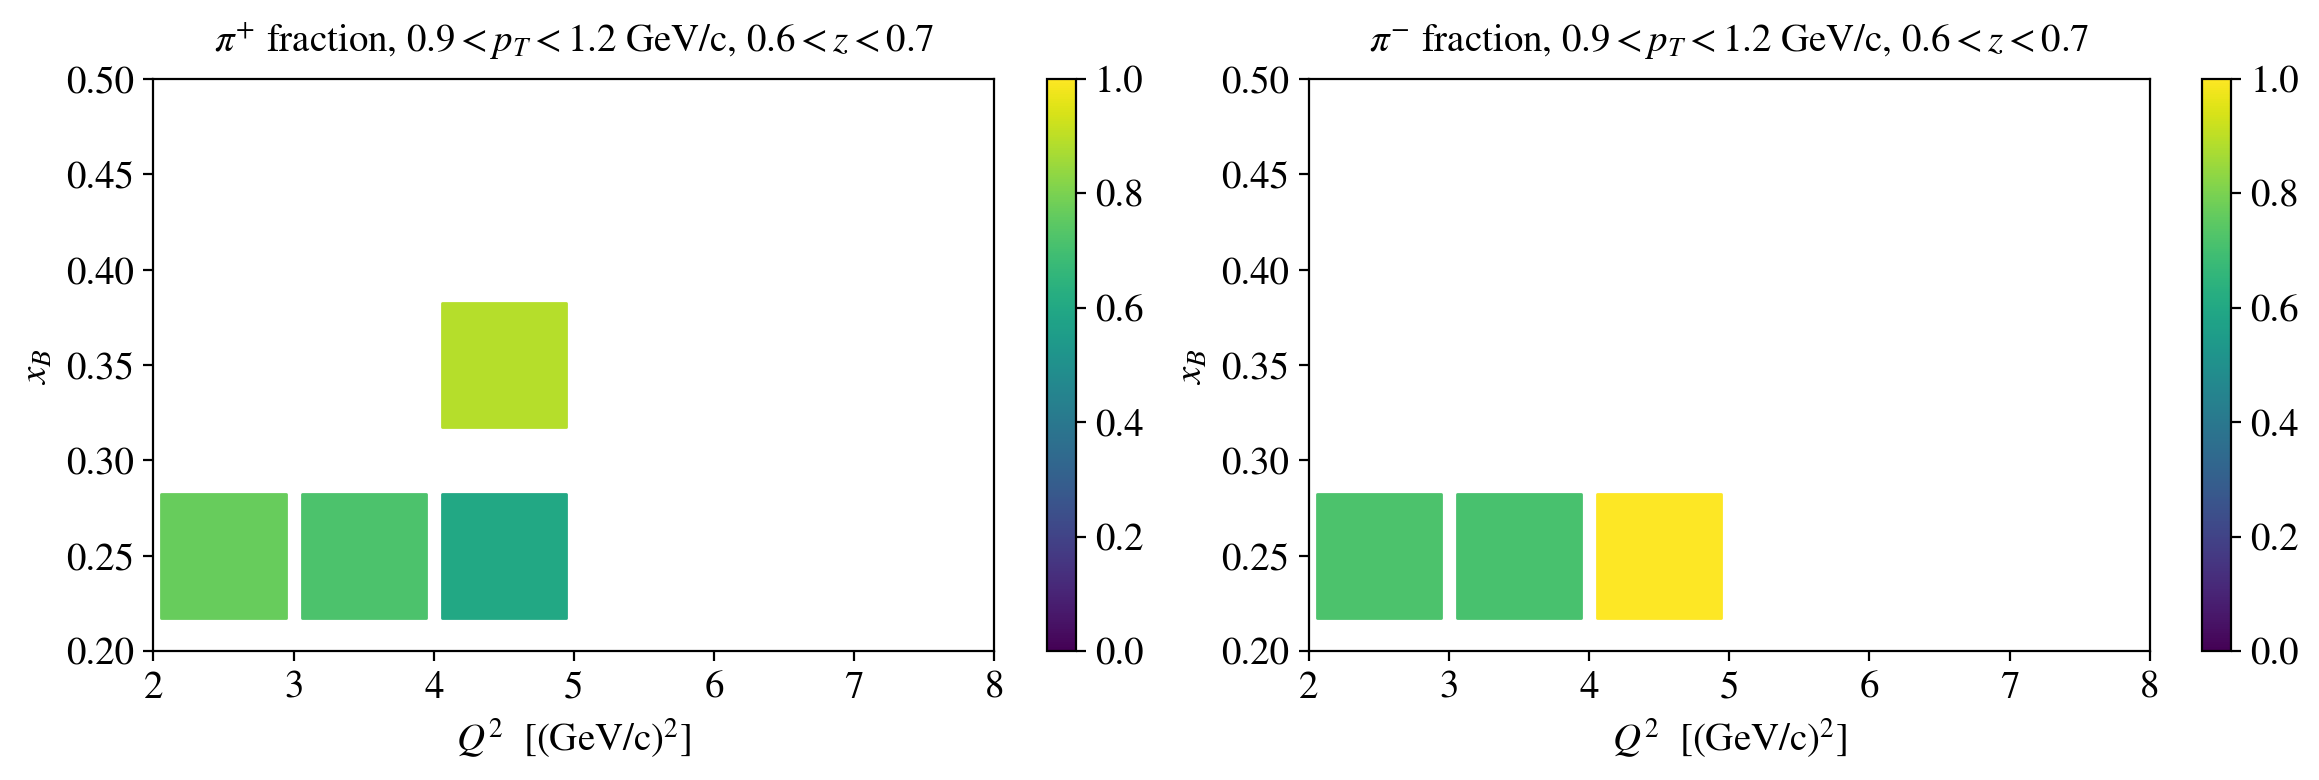

In [15]:
fig = plt.figure(figsize=(12,4),tight_layout=True); 
z_min  = 0.6
pT_min = 0.9
z_max  = z_min + 0.1; pT_max = pT_min + 0.3
for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    df = df_direct_ratio[pi_ch]
    ax = fig.add_subplot(1,2,pi_idx);
    df = df[(np.abs(df.z_min - z_min)<0.01) & (np.abs(df.pT_min - pT_min)<0.01)]
    Q2 = (df.Q2_min + df.Q2_max)/2
    xB = (df.xB_min + df.xB_max)/2
    z  = (df.z_min + df.z_max)/2
    f_direct = df.f_direct;
    mask = (f_direct>0)
    x, y, z = Q2[mask], xB[mask], f_direct[mask]
    vmin, vmax = 0 , 1
    plt.scatter( x, y, c=z, s=2000, marker='s', vmin=vmin, vmax=vmax);
    cbar = plt.colorbar(); cbar.ax.tick_params(labelsize=14);    
    set_axes(ax,'$Q^2$  [(GeV/c)$^2$]','$x_B$ ',
             title='$'+pi_label+'$ fraction, $%.1f<p_T<%.1f$ GeV/c, $%.1f<z<%.1f$'%(pT_min, pT_max, z_min, z_max),
             xlim = (np.min(Q2)-0.5, np.max(Q2)+0.5),ylim = (np.min(xB)-0.05,np.max(xB)-0.05),fontsize=14)
    

In [16]:
import seaborn as sns

In [17]:
def plot_heatmap_from_XYZ(x,y,z,
                          ax = None,
                          xticklabels=np.arange(2.5,8,1), 
                          yticklabels=[0.25, 0.35, 0.45, 0.55], 
                          fmt='.2f', 
                          vmin = 0, vmax = 1, 
                          annot_kws=None):
    
    if ax is None:
        fig = plt.figure(figsize=(8,5),tight_layout=True);                 
        ax = fig.add_subplot(1,1,1);


    df = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    df.columns = ['X','Y','Z']
    pivotted = df.pivot('Y','X','Z')
    mask = (pivotted == 0)
    sns.heatmap(pivotted,
                    cmap='hot_r', annot=True, 
                    mask = mask,
                    vmin = vmin, vmax = vmax,
                    xticklabels=xticklabels, yticklabels=yticklabels, fmt=fmt,
                    cbar=False, 
                annot_kws=annot_kws)
    ax.invert_yaxis()

/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.0_pT_0.3_and_0.3_z_0.4.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.0_pT_0.3_and_0.3_z_0.4.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.0_pT_0.3_and_0.6_z_0.7.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.0_pT_0.3_and_0.6_z_0.7.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.3_pT_0.6_and_0.3_z_0.4.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.3_pT_0.6_and_0.3_z_0.4.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.3_pT_0.6_and_0.6_z_0.7.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.3_pT_0.6_and_0.6_z_0.7.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.6_pT_0.9_and_0.3_z_0.4.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.6_pT_0.9_and_0.3_z_0.4.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.6_pT_0.9_and_0.6_z_0.7.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.6_pT_0.9_and_0.6_z_0.7.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.9_pT_1.2_and_0.3_z_0.4.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.9_pT_1.2_and_0.3_z_0.4.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.9_pT_1.2_and_0.6_z_0.7.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pion_fraction_0.9_pT_1.2_and_0.6_z_0.7.pdf


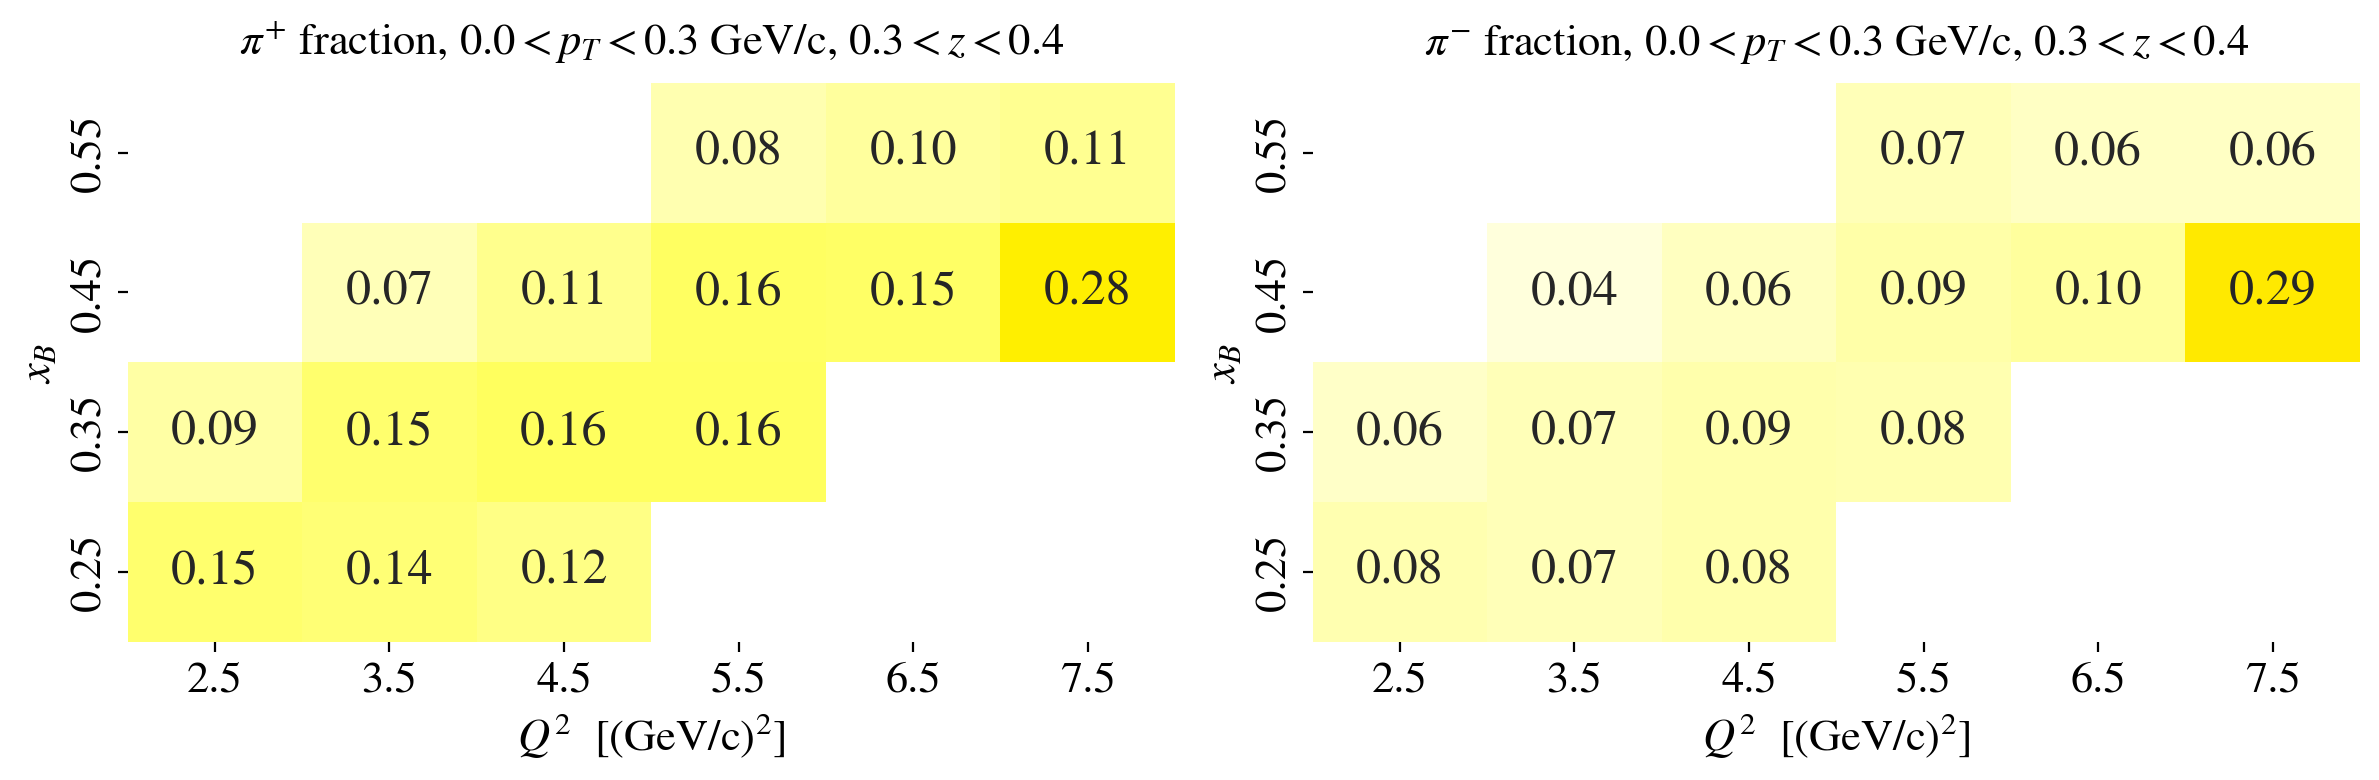

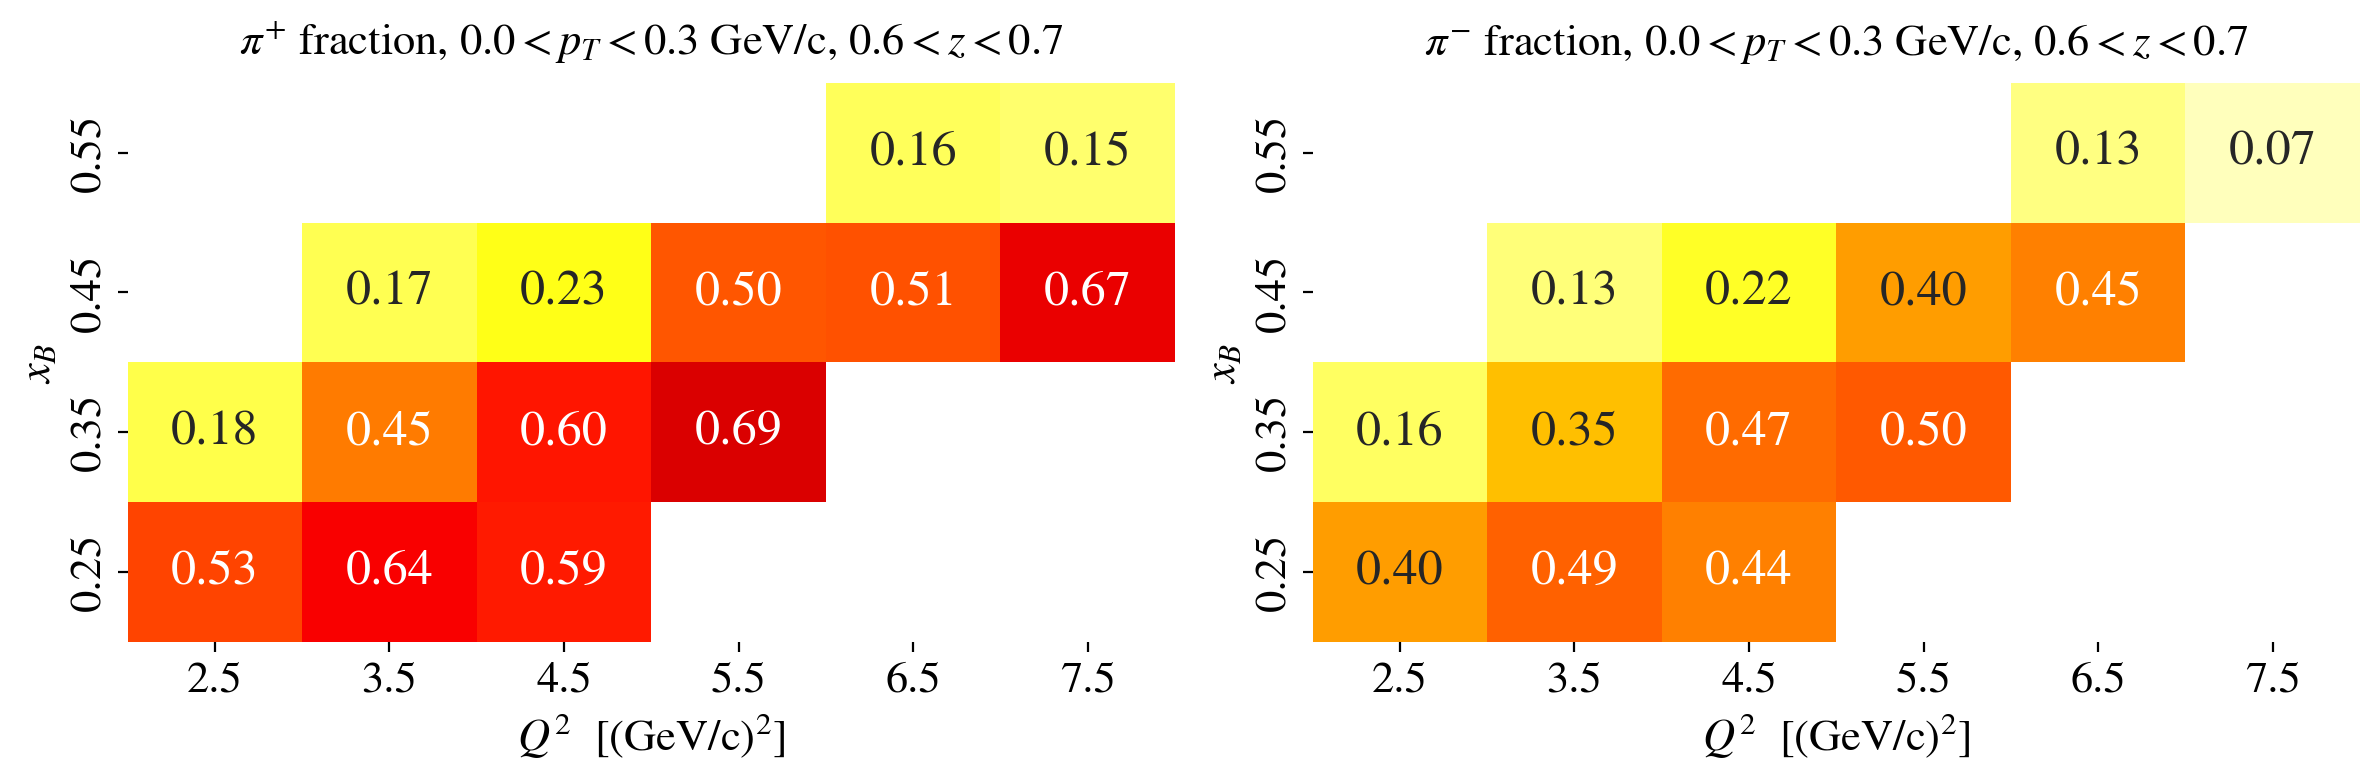

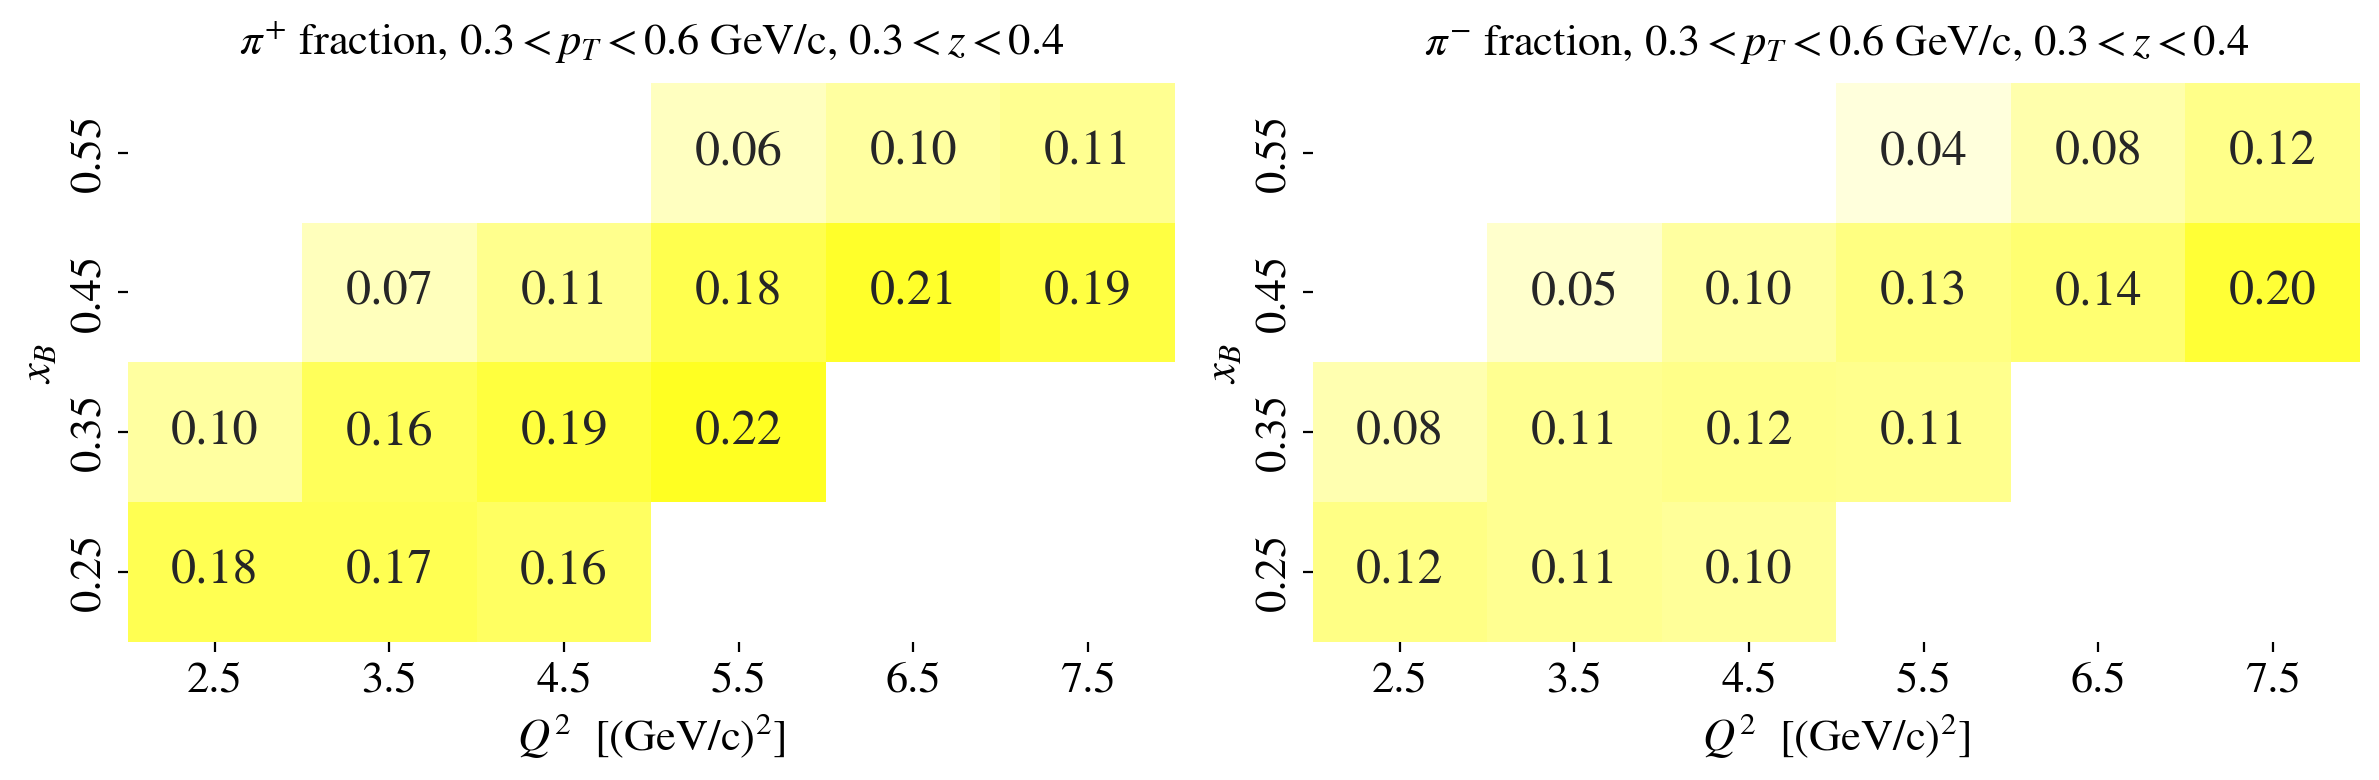

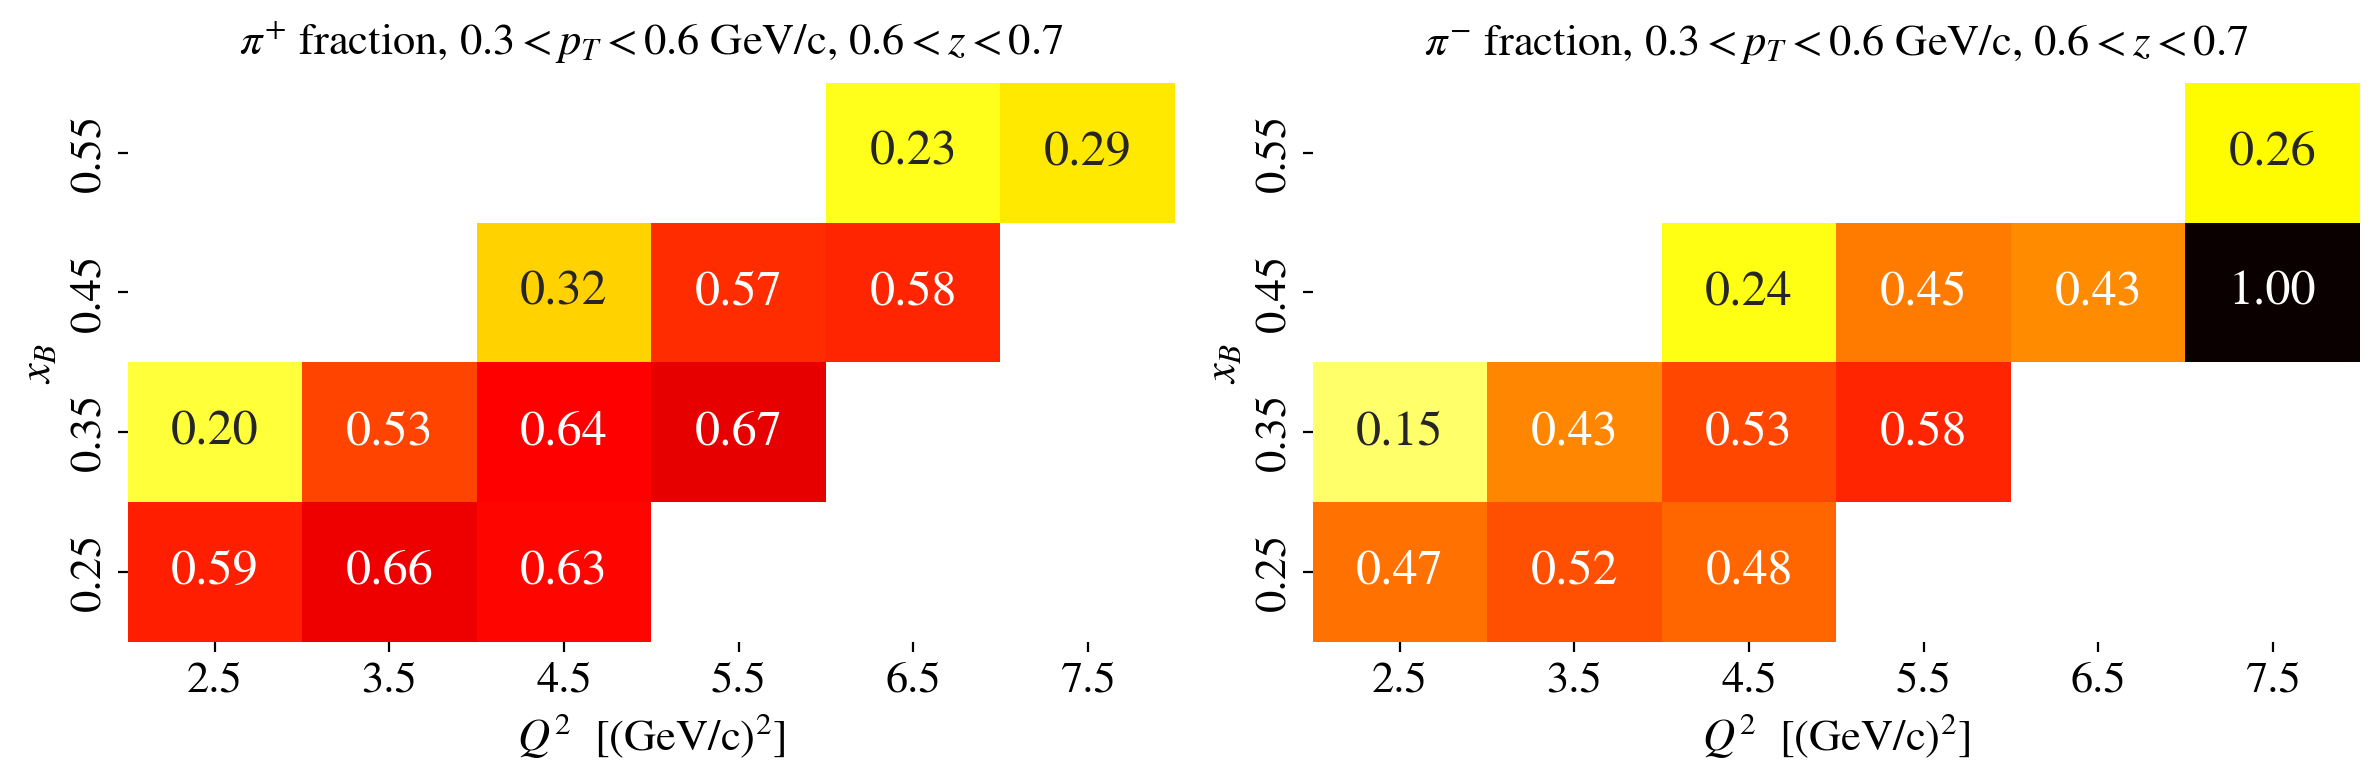

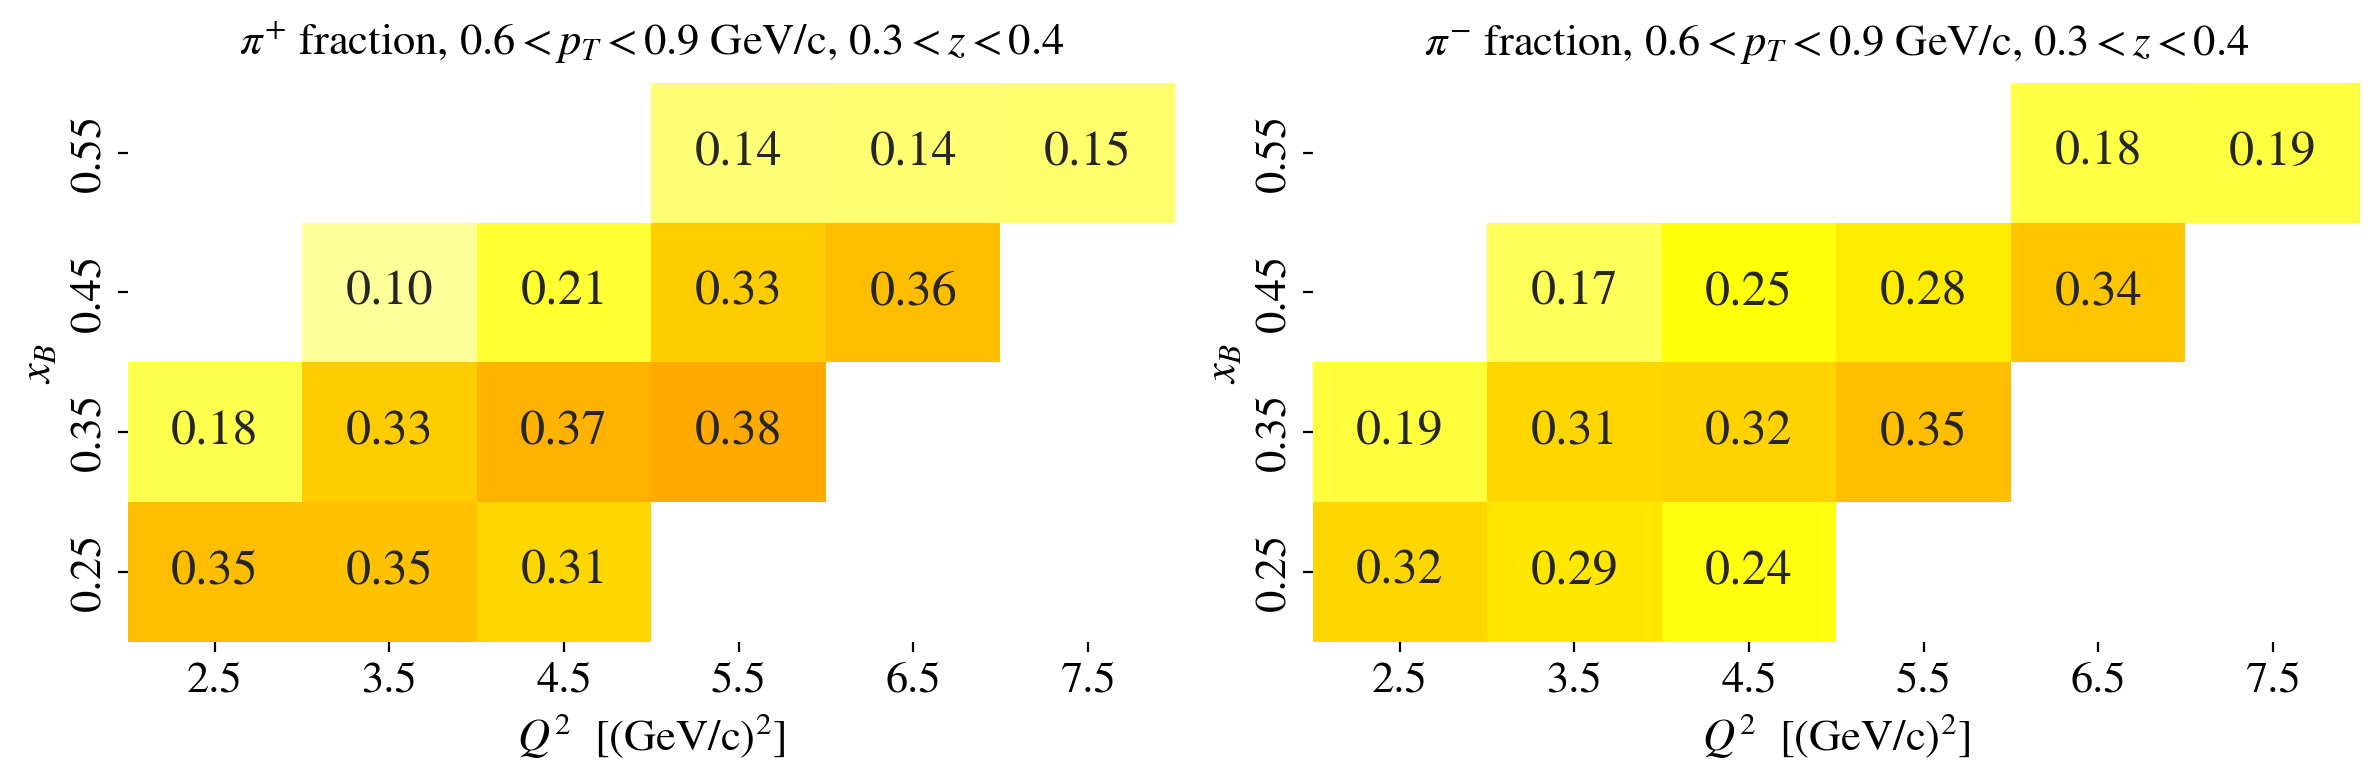

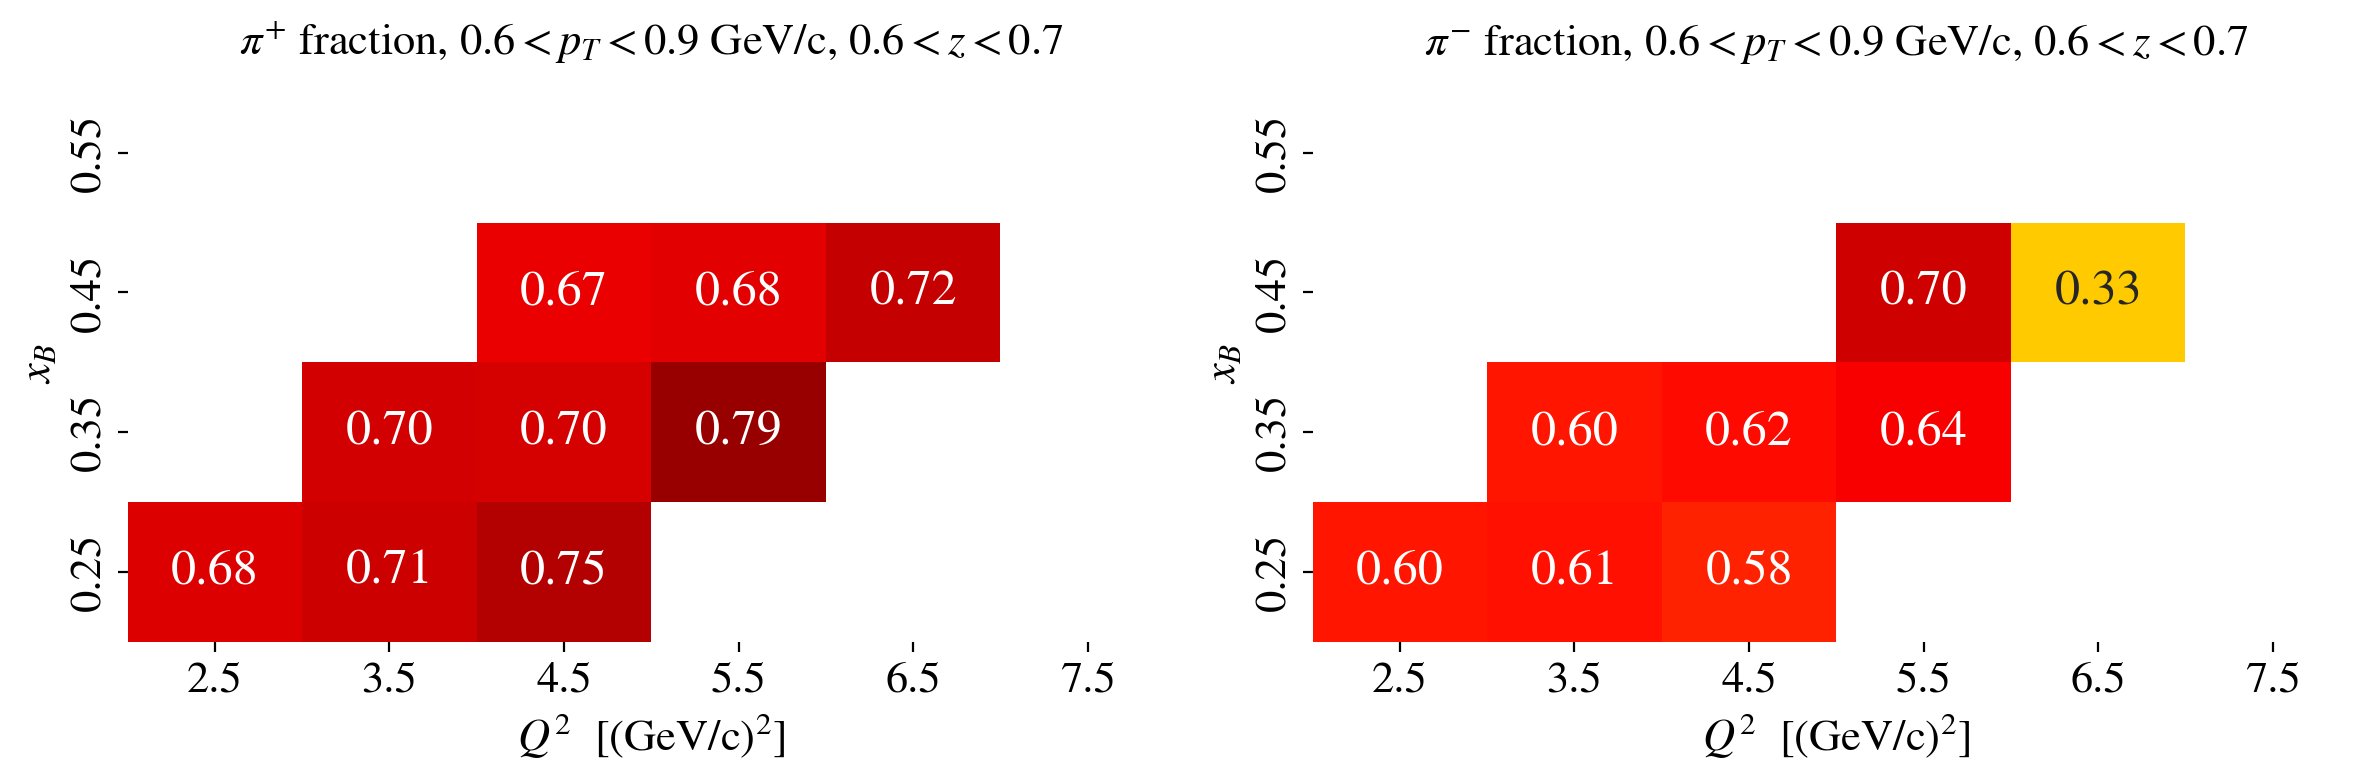

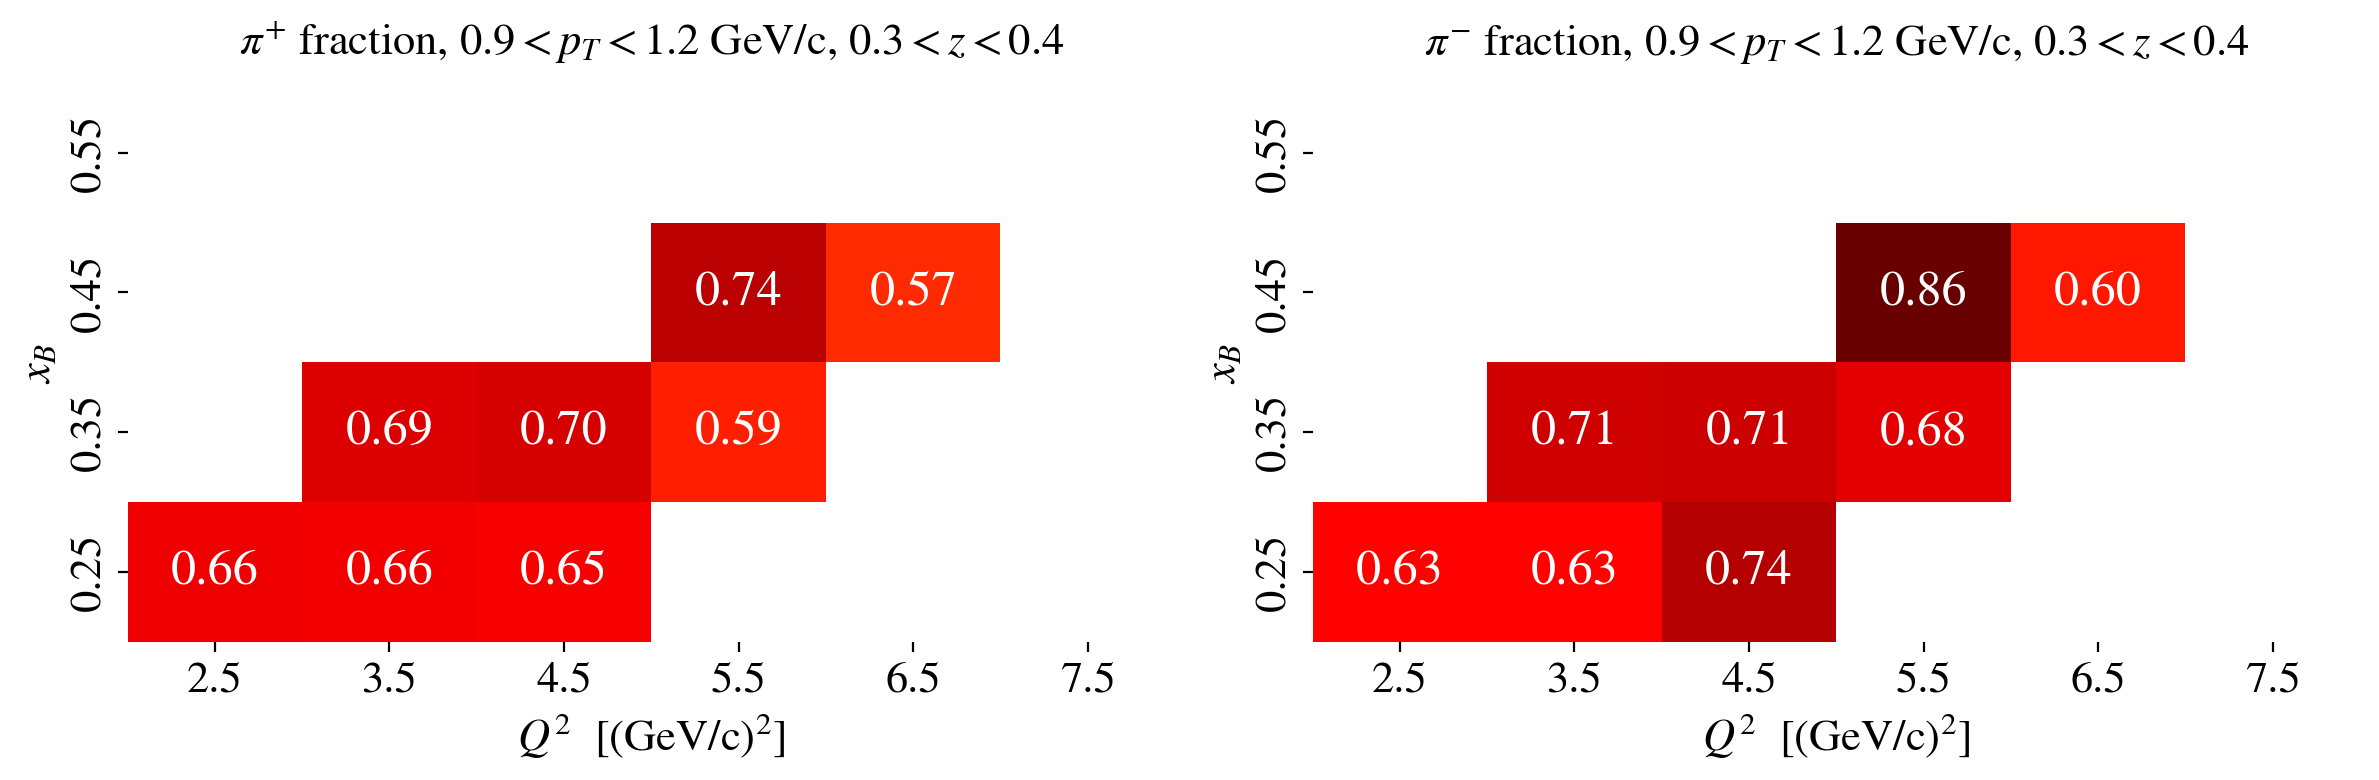

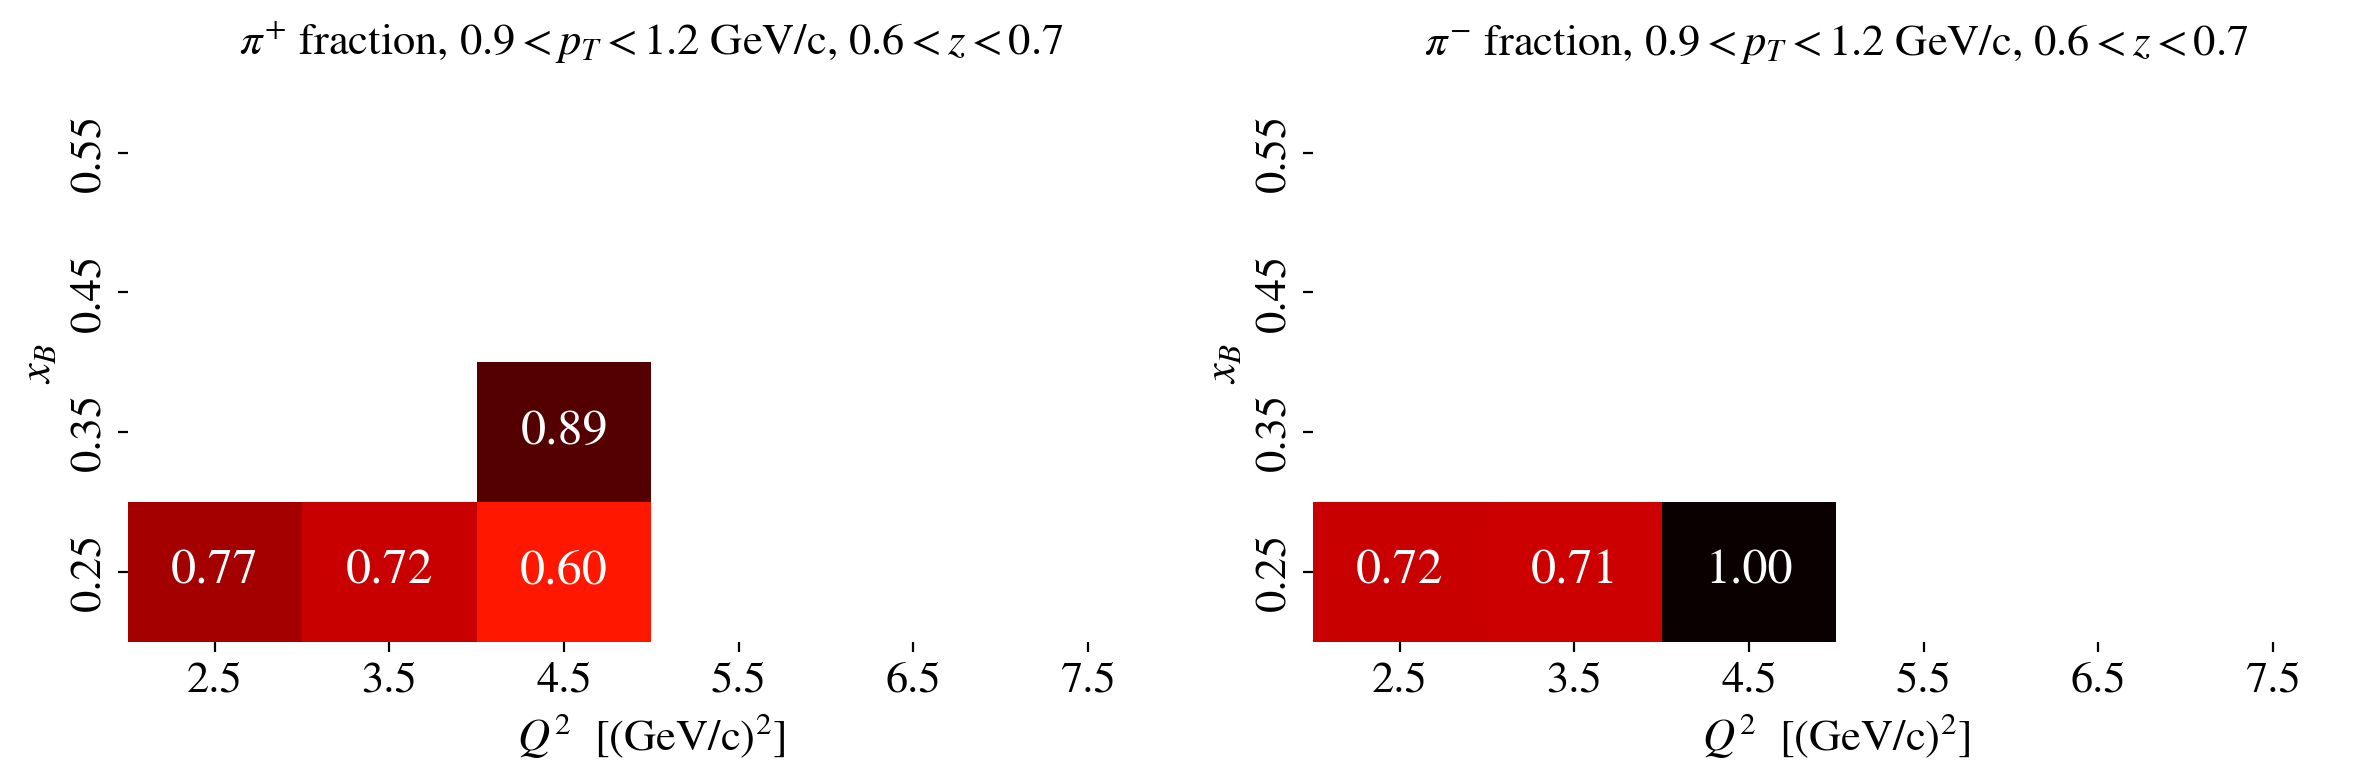

In [18]:
for pT_min in [0,0.3,0.6,0.9]:
    for z_min in [0.3,0.6]:
        z_max  = z_min + 0.1; pT_max = pT_min + 0.3
        
        fig = plt.figure(figsize=(12,4),tight_layout=True); 
        for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
            df = df_direct_ratio[pi_ch]
            ax = fig.add_subplot(1,2,pi_idx);
            df = df[(np.abs(df.z_min - z_min)<0.01) & (np.abs(df.pT_min - pT_min)<0.01)]
            Q2 = (df.Q2_min + df.Q2_max)/2
            xB = (df.xB_min + df.xB_max)/2
            z  = (df.z_min + df.z_max)/2

            f_direct = df.f_direct;    
            plot_heatmap_from_XYZ(Q2, xB, f_direct,
                                  ax = ax,                            
                                  vmin = 0, vmax = 1, annot_kws={'size': 18})

            set_axes(ax,'$Q^2$  [(GeV/c)$^2$]','$x_B$ ',
                     title='$'+pi_label+'$ fraction, $%.1f<p_T<%.1f$ GeV/c, $%.1f<z<%.1f$'%(pT_min, pT_max, z_min, z_max),
                     fontsize=16)
            save_figure( filename = figures_path + 'CLASPYTH_direct_pion_fraction_%.1f_pT_%.1f_and_%.1f_z_%.1f'%(pT_min,pT_max,z_min, z_max) + '.pdf' )

/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pims2pips_ratio_0.0_pT_0.3.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pims2pips_ratio_0.3_pT_0.6.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pims2pips_ratio_0.6_pT_0.9.pdf


/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_38763/1287969162.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/CLASPYTH_direct_pims2pips_ratio_0.9_pT_1.2.pdf


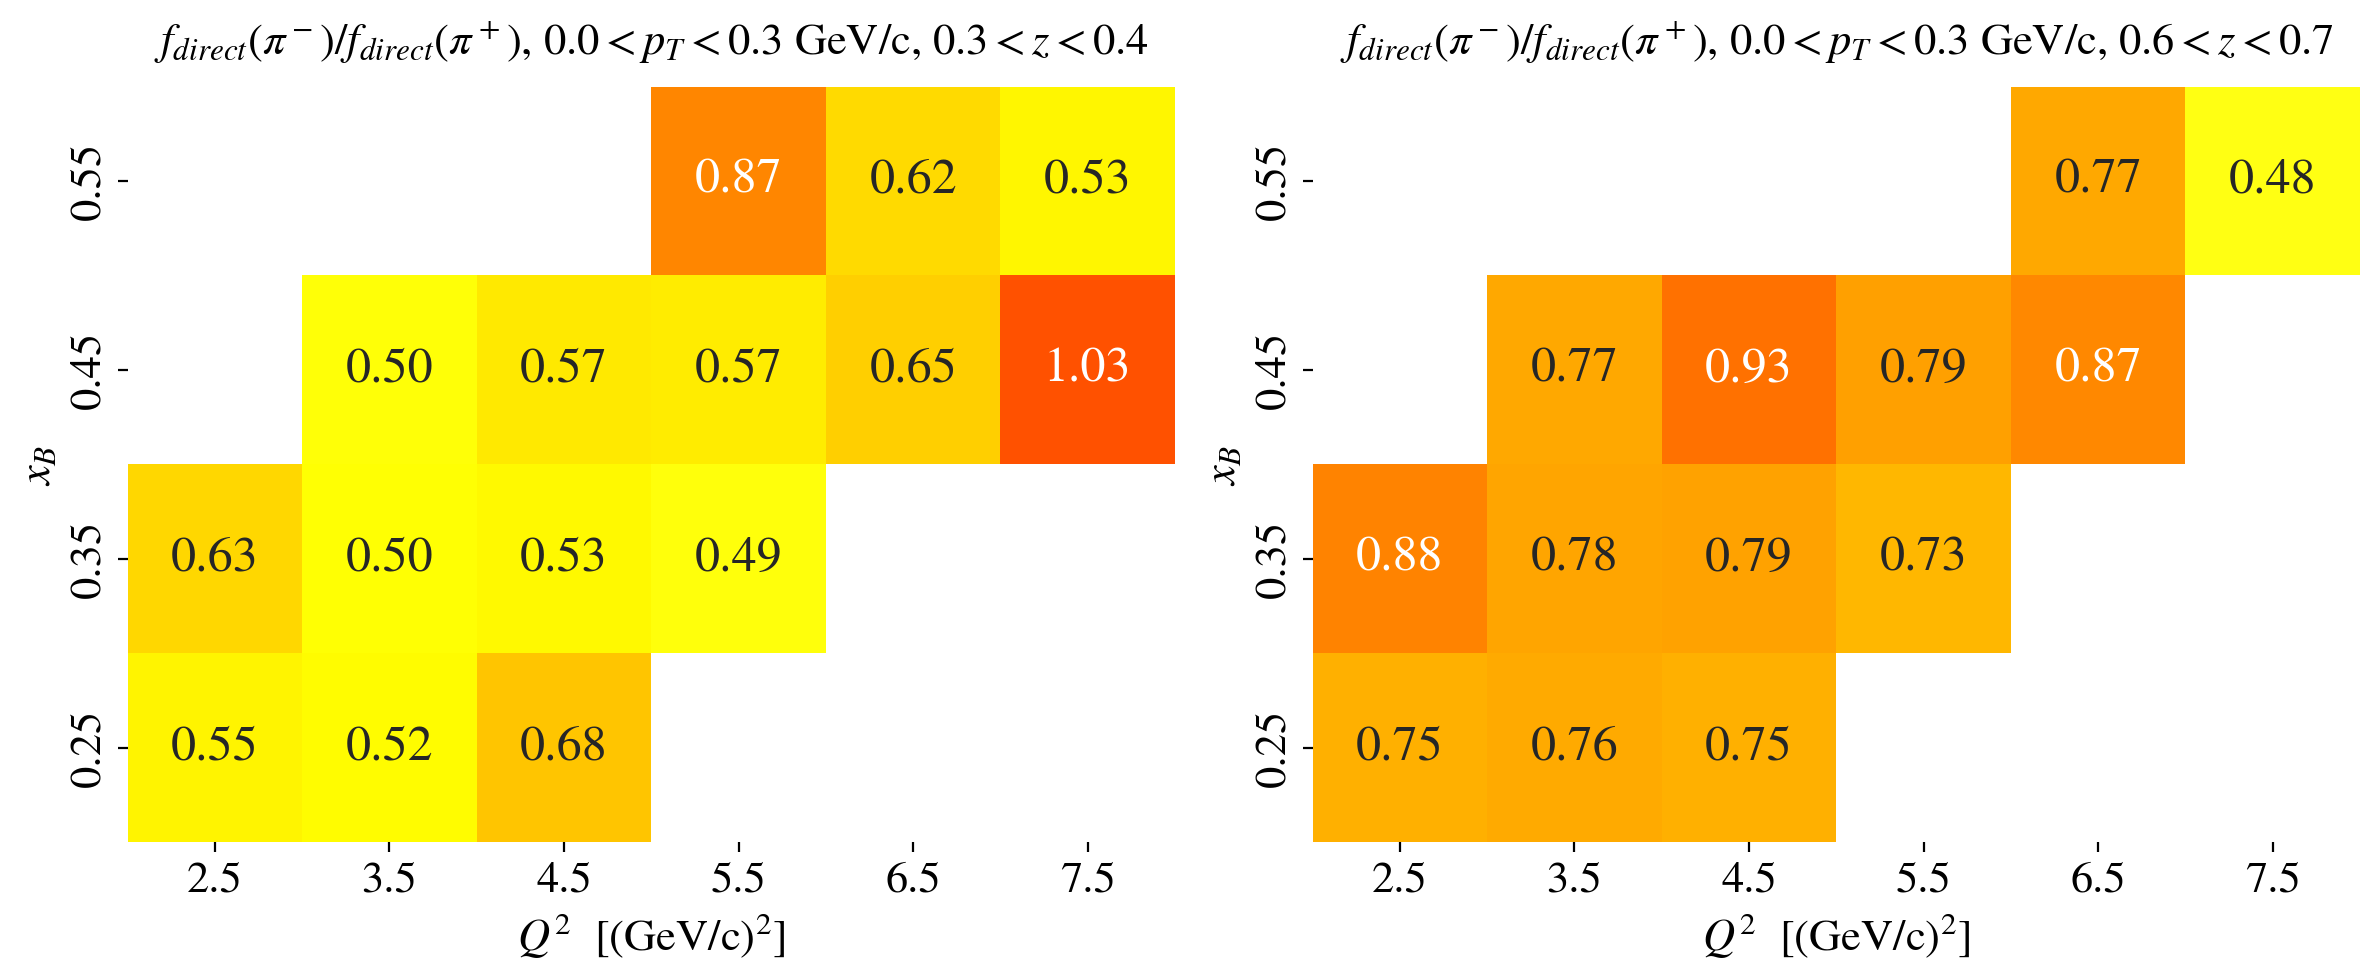

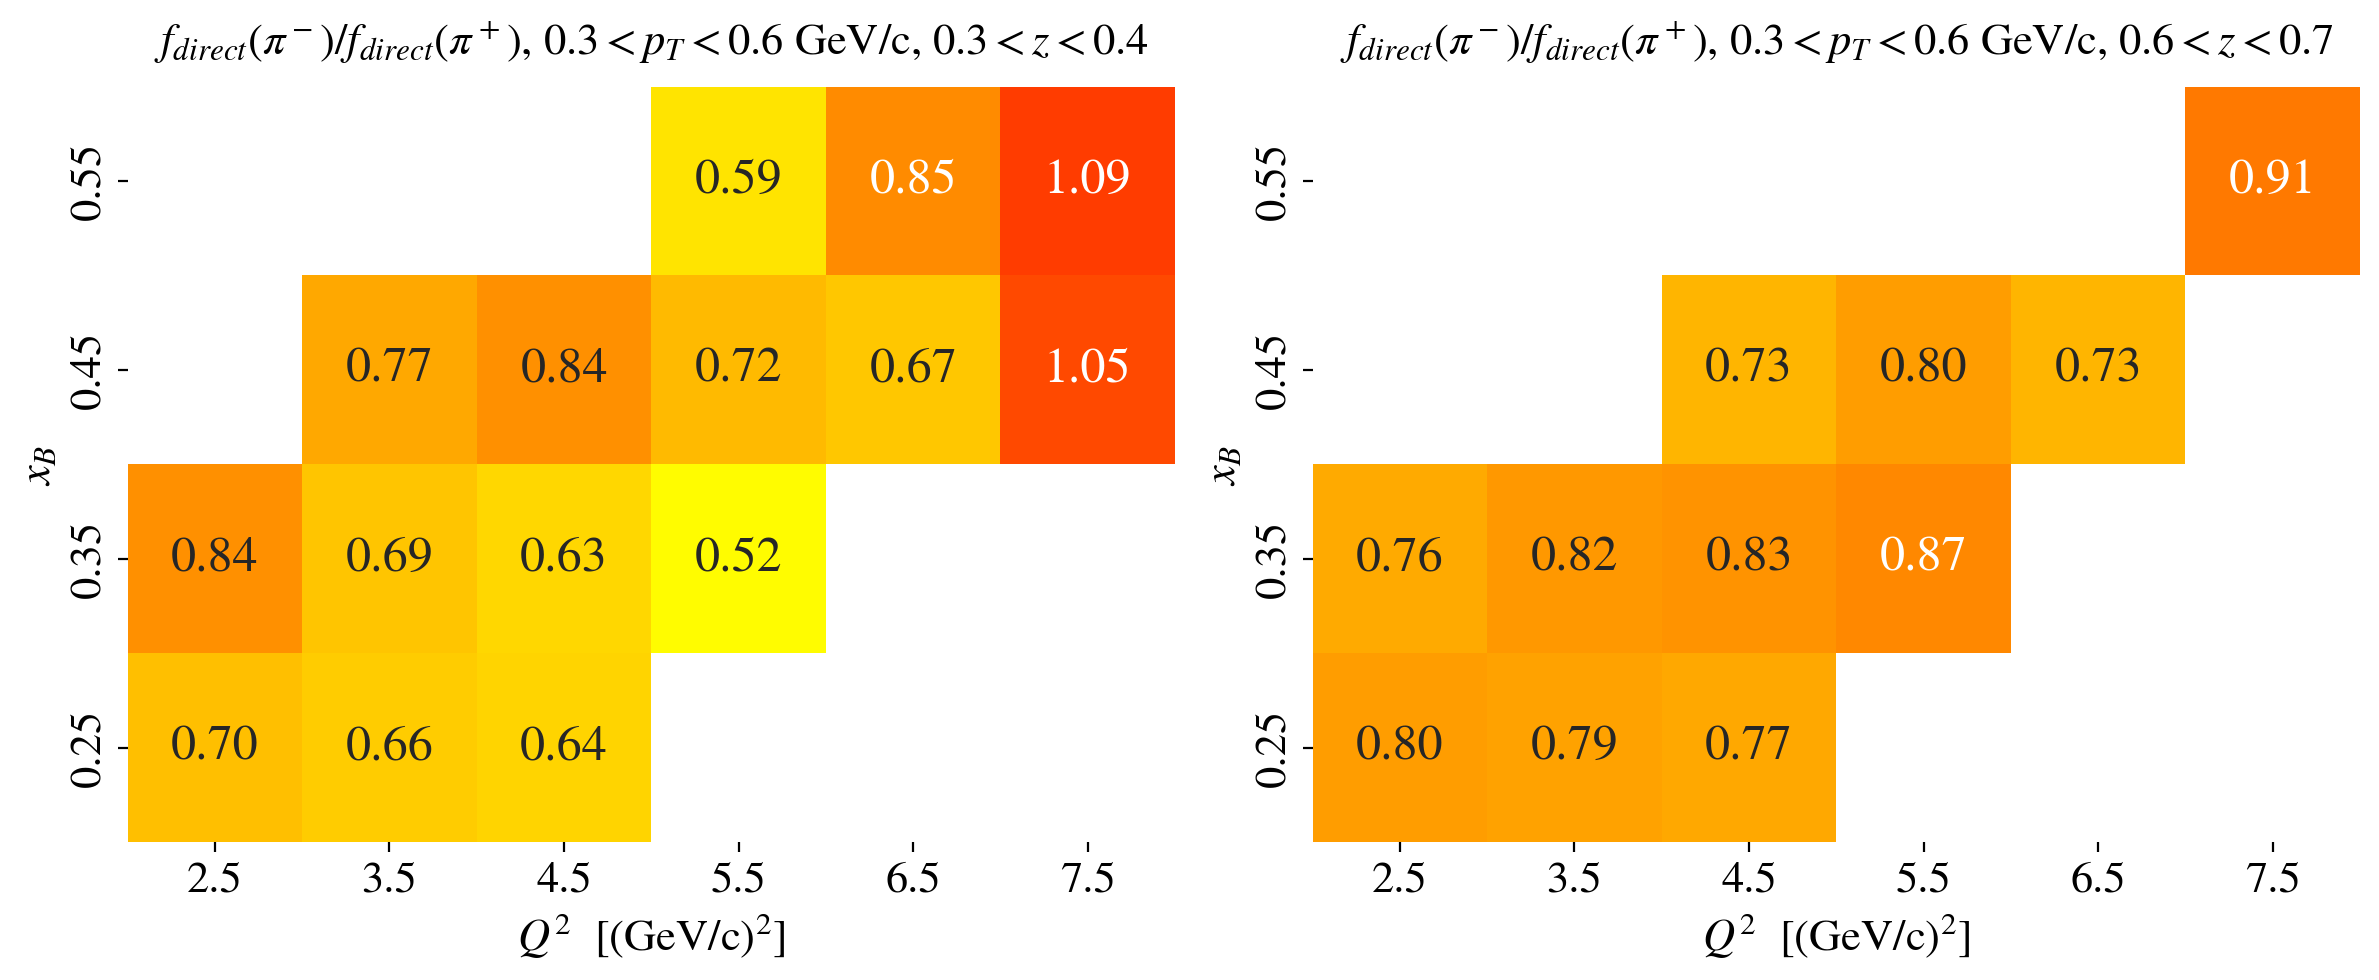

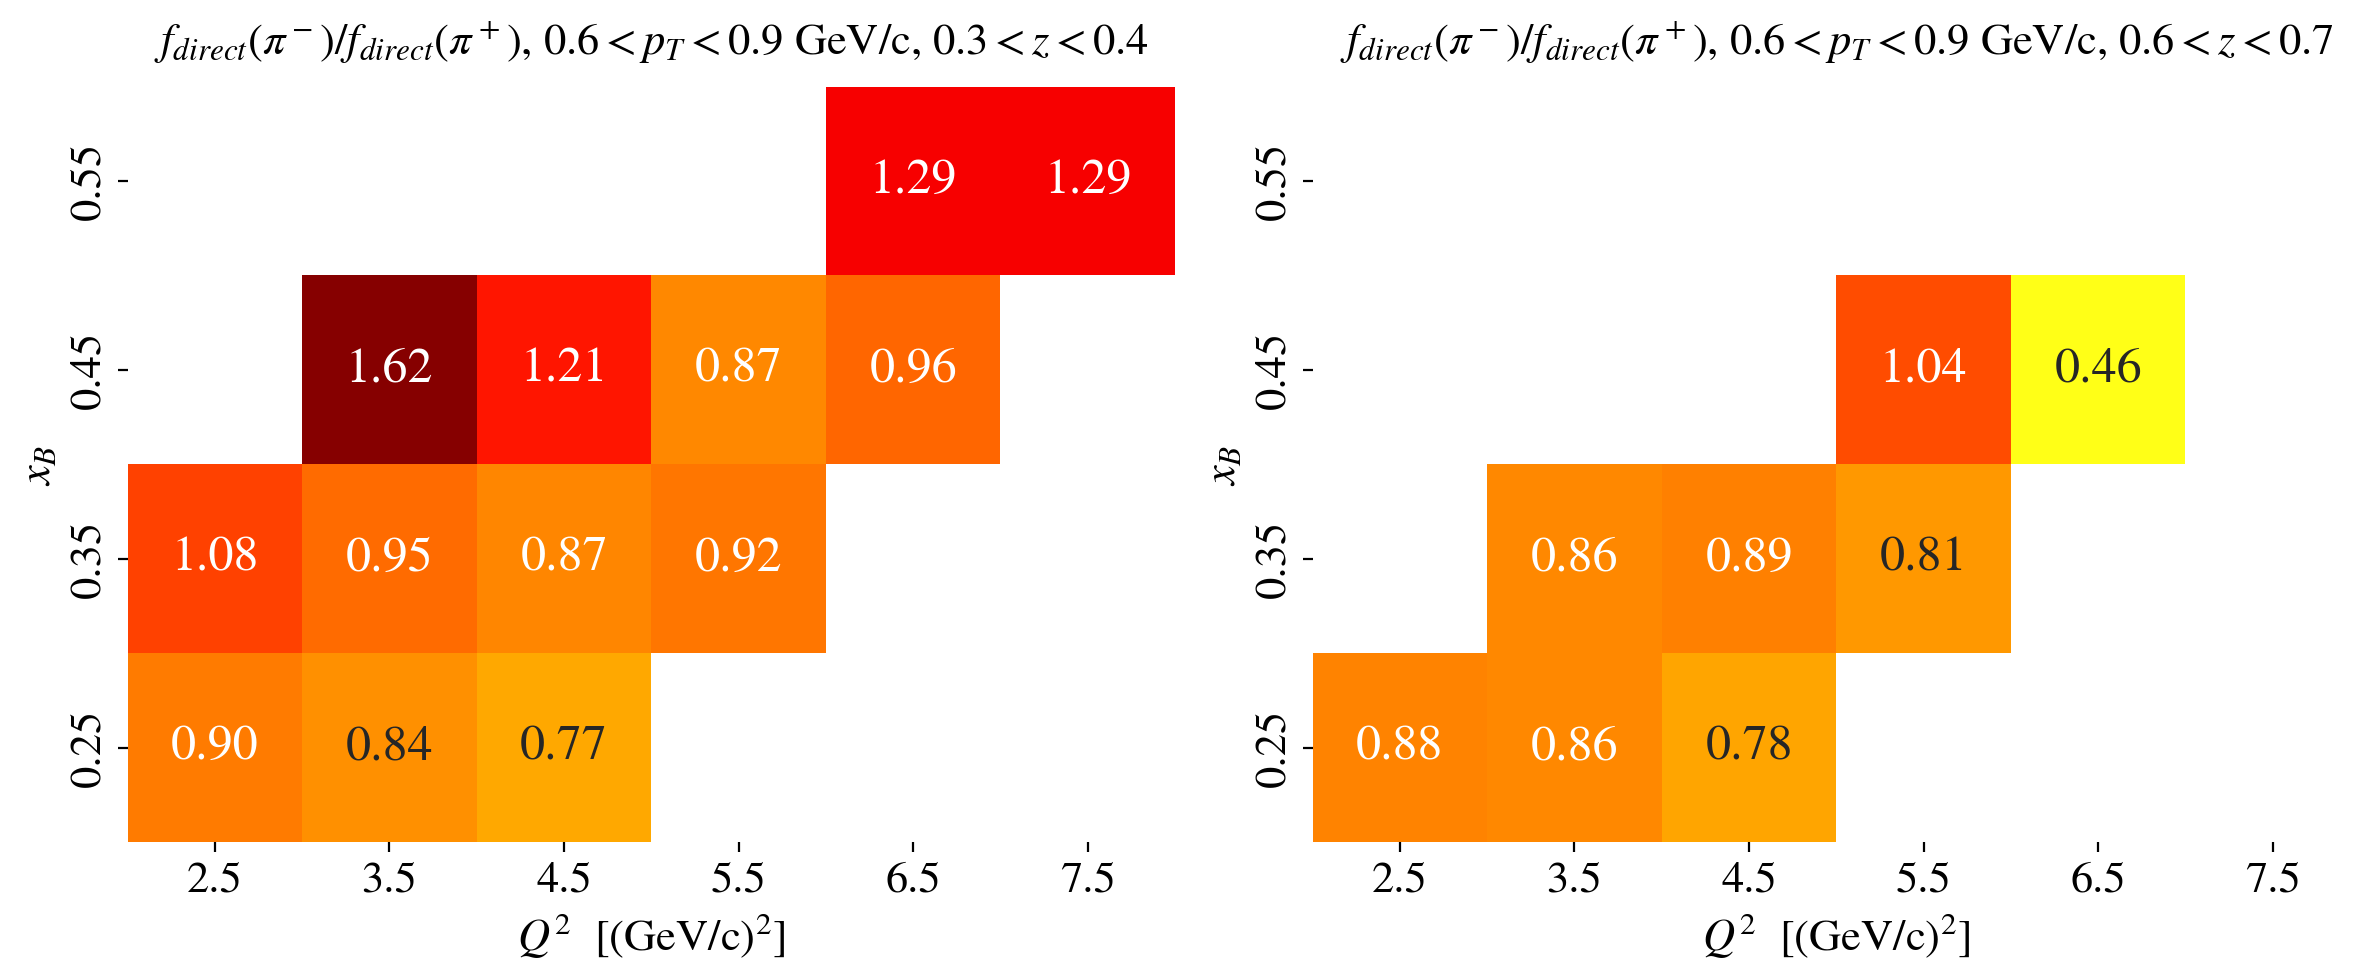

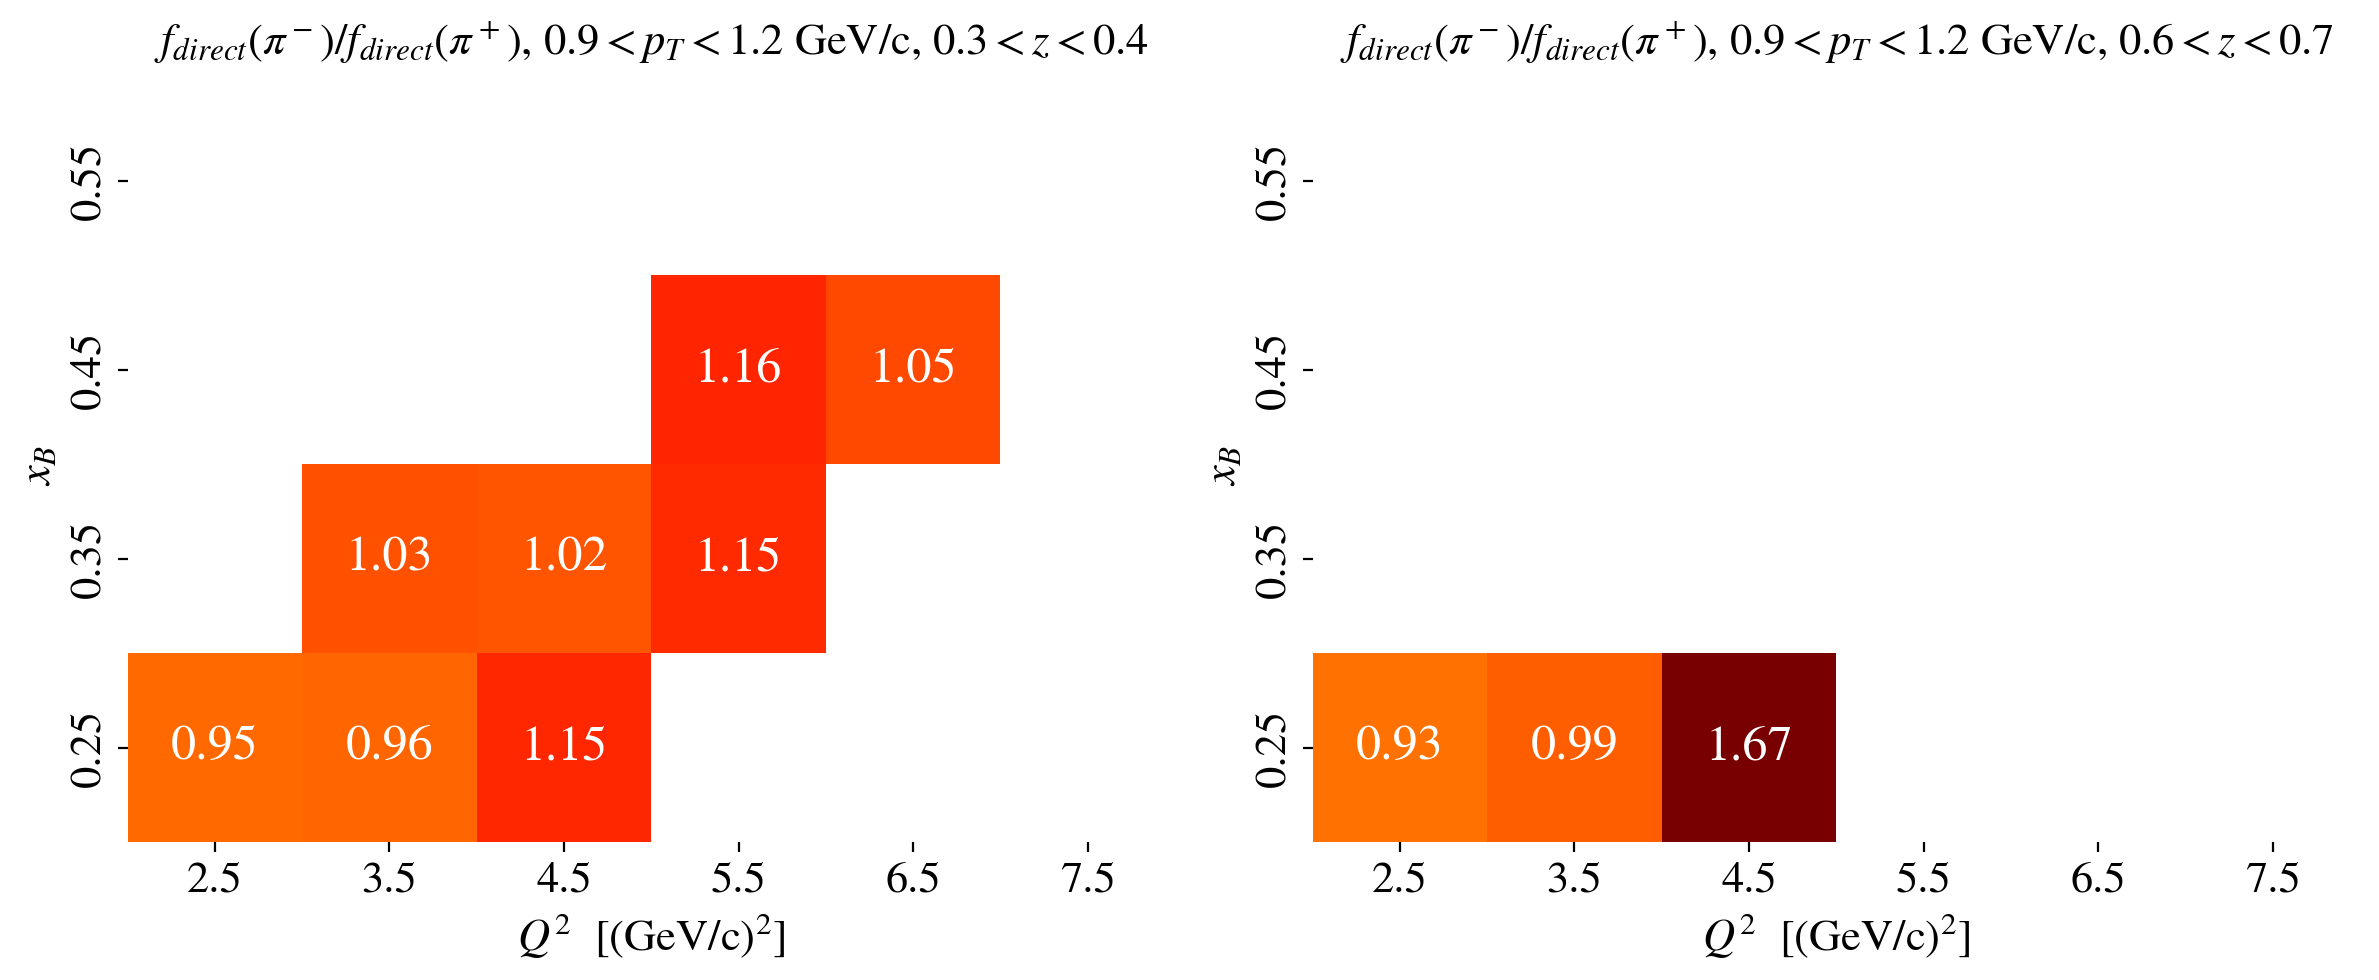

In [19]:
for pT_min in [0,0.3,0.6,0.9]:
    fig = plt.figure(figsize=(12,5),tight_layout=True);                 

    for z_min,z_idx in zip([0.3,0.6],[1,2]):
        z_max  = z_min + 0.1; pT_max = pT_min + 0.3
        
        
        df_pips = df_direct_ratio['piplus']
        df_pims = df_direct_ratio['piminus']
        
        df_pips = df_pips[(np.abs(df_pips.z_min - z_min)<0.01) & (np.abs(df_pips.pT_min - pT_min)<0.01)]
        df_pims = df_pims[(np.abs(df_pims.z_min - z_min)<0.01) & (np.abs(df_pims.pT_min - pT_min)<0.01)]
        
        f_direct_pips = df_pips.f_direct;
        f_direct_pims = df_pims.f_direct;
        
        '''
        "Correction" of the π+/π- cross-section ratio for non-direct pion production 
        
        The correction for pips/pims ratio is:
        direct π+/π- = (π+/π-) * (1/f(direct π+)) * (1/f(direct π-))
        '''
         
        f_direct_pims_2_pips = f_direct_pims/f_direct_pips;
        
        Q2 = (df_pips.Q2_min + df_pips.Q2_max)/2
        xB = (df_pips.xB_min + df_pips.xB_max)/2
        z  = (df_pips.z_min + df_pips.z_max)/2

        ax = fig.add_subplot(1,2,z_idx);
        plot_heatmap_from_XYZ(Q2, xB, f_direct_pims_2_pips,
                          ax = ax,
                          vmin = 0, vmax = 2, annot_kws={'size': 18})

        set_axes(ax,'$Q^2$  [(GeV/c)$^2$]','$x_B$ ',
                 title='$f_{direct}(\pi^-)/f_{direct}(\pi^+)$, $%.1f<p_T<%.1f$ GeV/c, $%.1f<z<%.1f$'%(pT_min, pT_max, z_min, z_max),
                 fontsize=16)
    save_figure( filename = figures_path + 'CLASPYTH_direct_pims2pips_ratio_%.1f_pT_%.1f'%(pT_min,pT_max) + '.pdf' )